## Sentiment Classification - A NLP Project

This is a blog about NLP and Classification project. NLP is Natural Language Processing and is highly in demand right now. Let's understand how can you make use of NLP. We will understand the process and concept via coding. I will cover BagOfWords and n-gram in this blog alongwith Naive Bayes Classification model. The unique thing about this blog (which is making it long!) is that I have shown how we can select the right model for us based on the dataset in our hand. So, let's start.

### Import the basic libraries

We will import the required libraries as our requirement comes up while coding. First, let us import pandas, numpy, matplotlib, seaborn, regex, and random library which are quite extensively used.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import regex as re

#below code is for not showing up any warnings that might appear for the ongoing improvements in functions
import warnings
warnings.filterwarnings('ignore')

### Import the dataset in the form of dataframe

I have downloaded a dataset on movie reviews from Kaggle. Movie dataset is the most commonly used dataset for sentiment classification learning. I will be showing you sentiment classification over live projects as well in a separate blog. Let's continue with our learning now.

In [2]:
#Reading the csv file into the dataframe

df = pd.read_csv('movie.csv')

In [3]:
#Let's look into the first ten records

df.head(10)  #if no parameter is provided then the head() function will show 5 records, else it will show as many as you will provide

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


Now, remember that the sentiments marked as 1 are positive and those that are 0 are negative. This is how it has been labeled and you will get this information when you download it from the site. Now we will start exploring the dataset a bit.

In [4]:
# to get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8488 entries, 0 to 8487
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8488 non-null   object
 1   label   8488 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 132.8+ KB


The dataset is not containing Null data. Good for us! Let's move on to see the number of positive and negative feedbacks.

In [5]:
df['label'].value_counts()

label
0    4318
1    4170
Name: count, dtype: int64

There are 4318 negative comments and 4170 positive comments. Since the presence of both types of feedback is almost the same, we will not be performing sampling in the dataset. However, we might get more accuracy if we do perform sampling. Let's plot the sentiment numbers.

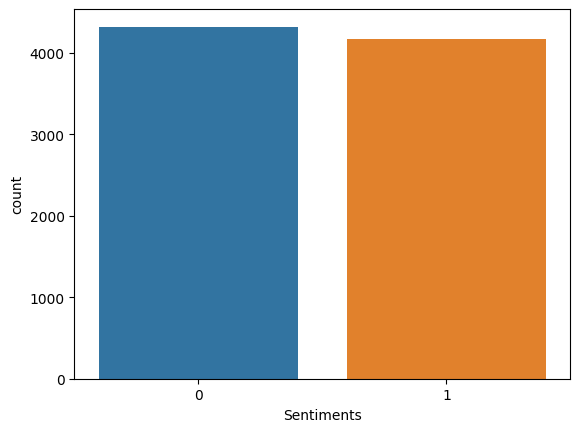

In [6]:
sns.countplot(x = 'label', data = df)
plt.xlabel('Sentiments')
plt.show()

### Text Processing

Now we are moving to the fun part! Processing the text. I am going to show you the Bag Of Words method first. So what is it? <br/>
When we are using text data, we do not have features as we would see in structured tabular data. Thus, we need some measures to get the features out of the text data with us. What if we can take each word from a sentence and get some kind of measure by which we can find out if the word exists in another sentence or not and also its importance? This is certainly possible by the process called the Bag Of Word Model. That is, each sentence in our movie review dataset is treated as a bag of words, thus each sentence is called a document. All the documents together make up a corpus. 

If it sounds confusing to you then don't worry! This explanation will make it clearer - <br/>
We will first create a dictionary of all the unique words used in the corpus (which means all the documents or reviews present in the dataset). We do not consider grammar like the, an, is, etc., while making the word count, since this does not hold any significant importance in understanding the text context. Then we will convert all the documents (individual reviews) into vectors which will represent the presence of words from our dictionary in the particular documents. There are three ways to identify the importance of words in the BoW model - <br/>
<ul>
    <li> Count Vector Model </li>
    <li> Term Frequency Vector Model - tf</li>
    <li> Term Frequency-Inverse Document Frequency Model - tf-idf</li>
</ul>

Count Vector Model will count the number of appearances of the words in a full sentence. Its better to understand visually, so suppose we have the below statements - <br/>
review1 = 'Movie was very very good'<br/>
review2 = 'Movie was disappointing'<br/>
In count vector model, the reviews will show up as such - 

In [100]:
d = pd.DataFrame([
    {'Documents' : 'Movie was very very good',
    'Movie' : 1,
    'was':1,
    'very':2,
    'good':1,
    'disappointing':0},
    {'Documents' : 'Movie was disappointing',
    'Movie' : 1,
    'was':1,
    'very':0,
    'good':0,
    'disappointing':1}
], index = [1,2])
d

,Documents,Movie,was,very,good,disappointing
1,Movie was very very good,1,1,2,1,0
2,Movie was disappointing,1,1,0,0,1


Term Frequency Model - In this, the frequency of each word is calculated in each document (or sentence) with respect to the total number of word was observed in the full document. It is given by - <br/>
TF = Number of occurences of word in ith document / Total number of words in the ith document

Term Frequency-Inverse Document Frequency Model - TFIDF measures the importance of word in a particular sentence. The importance of a word in a sentence is directly proportional to its number of presence in the document and is inversely proportional to the frequency of the same word in full corpus. It is given by - <br/>
TF-IDF = TF x ln (1+N/Ni), where N is the total number of documents in corpus and Ni is the document which is containing the word i.

Okay! That's a lot of theory. Let's understand the concept via coding. We will first count the number of times each word is appearing in each document by using CountVectorizer function

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
#initializing the CountVectorizer
count_vector = CountVectorizer()

#creating dictionary of words from the corpus
features = count_vector.fit(df['text'])

#Let's see the feature names extracted by the CountVectorizer
feature_names = features.get_feature_names_out()
feature_names

array(['00', '000', '001', ..., 'über', 'ünfaithful', 'żmijewski'],
      dtype=object)

In [9]:
print('Total Number of features extracted are - ',len(feature_names))  

Total Number of features extracted are -  48618


This represents the presence of 48618 unique features in our dataset. This is because we have not cleaned the texts out of unwanted texts. We will do this eventually. Let's move on!

In [10]:
#Let's randomly pickup 10 feature names out of it

random.sample(set(feature_names), 10)

['discirnable',
 'slough',
 'gonzales',
 'hermandad',
 'lilia',
 'cartilage',
 'aau',
 'faboulous',
 'tings',
 'sept']

As we can see these are the feature names and not the vector form of it. We have to convert the features into its vector form.

In [11]:
feature_vector = count_vector.transform(df['text'])

In [12]:
feature_vector.shape

(8488, 48618)

From the shape, we can see that all the 8488 documents are represented by 48618 features (which are unique words). For the words which are present in the document, the corresponding feature will carry the number of times that word has appeared in the document. If the word is not present then the feature gets 0 value. As a result we turn up getting a lot of 0s in the vector data. In order to know the number of 0s present in the feature vector, do as below -


In [13]:
feature_vector.getnnz()

1158500

In [14]:
# To get the non-zero value density in the document

feature_vector.getnnz()/(feature_vector.shape[0]*feature_vector.shape[1])

0.0028073307190965642

There are so less non zero values in our feature vector! Most of it are zero! You can visualize your sparse matrix as below -

In [15]:
feature_vector.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Clearly we need to fix our dataset before proceeding with correct classification. Let's start -

First, let's remove the stop words from the sentences since they do not hold any essential meaning. Stop words are words like the, an, was, is, etc. This will reduce the number of features. We will import the stopwords from nltk library -

In [15]:
from nltk.corpus import stopwords

In [16]:
#since the reviews are in english, stopwords will be in english that we need to set as below -

all_stopwords = set(stopwords.words('english'))

In [17]:
#this is how stop words looks like -

list(all_stopwords)[:10]

["doesn't",
 "weren't",
 'each',
 "she's",
 'himself',
 'did',
 'about',
 'through',
 'the',
 'should']

Now we will again start from the beginning that is we will again call the countvectorizer but this time with an additional parameter of stop_words which will stop the stopwords from appearing in the count vector -

In [18]:
count_vector2 = CountVectorizer(stop_words=list(all_stopwords))
feature_names2 = count_vector2.fit(df['text'])
feature_vector2 = count_vector2.transform(df['text'])

In [19]:
feature_vector2.shape

(8488, 48473)

Previously, the number of features were 48618 and now its 48473. The is a slight reduction. We need to reduce more. Let's see the feature names first -

In [20]:
feature_names = feature_names2.get_feature_names_out()
feature_counts = np.sum(feature_vector2.toarray(), axis = 0)

In [21]:
pd.DataFrame(dict(Features = feature_names, Count = feature_counts))

,Features,Count
0,00,41
1,000,115
2,001,1
3,007,7
4,0080,1
...,...,...
48468,önsjön,1
48469,úber,1
48470,über,6
48471,ünfaithful,1


If we look into the features then we will observe that there are many non english words and numbers which is polluting the dataset. Let's clear them up -

In [22]:
#we will use the regex module to go through each document and look for the non english characters and will replace them with a space in our document
for word in df.text[:][:10]:
    review = re.sub('[^a-zA-Z]',' ',word)

Now its a good idea to turn all the words in the review sentence in lowercase and then remove the stopwords since vectorizer tends to create two vectors for say hello and HELLO due to differences in cases.

In [23]:
sentences = []
for word in df.text:
    review = re.sub('[^a-zA-Z]',' ',word)
    review = review.lower()
    sentences.append(review)

sentences are now cleaned form of df['text']. Let's apply counvectorizer after removing the stop words from sentences and observe the difference in features.

In [24]:
count_vector3 = CountVectorizer(stop_words=list(all_stopwords))
feature_names3 = count_vector3.fit(sentences)
feature_vector3 = count_vector3.transform(sentences)

In [25]:
feature_vector3.shape

(8488, 47672)

Features has reduced from 48473 to 47672. Not a big difference! Let's see the feature along with its count once -

In [26]:
feature_names = feature_names3.get_feature_names_out()
feature_counts = np.sum(feature_vector3.toarray(), axis = 0)
pd.DataFrame(dict(Features = feature_names, Count = feature_counts))

,Features,Count
0,aa,3
1,aaaaah,1
2,aaaaargh,1
3,aaaaarrrrrrgggggghhhhhh,1
4,aaah,1
...,...,...
47667,zzzz,1
47668,zzzzzzzzzzzz,2
47669,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,1
47670,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,1


As we can see that there are such reviews which do not hold any such meaning. We will get rid of those. Let's understand the meaning of stemmer and lemmatization first. <br/>
Stemming is the process of reducing the words to its root form. Stemming chopps of the end portion of the word and brings it back to it root form since vectorizer treats similar meaning words but differenly written as two different features. For example, love, loving, and loved all are having similar meaning in different forms. Stemmer will chop off each word to its root form of lov. This will lead to the creating of a single feature instead of 3. One problem with stemming is that the words created after stemming is not a part of vocabulary and stemming also cannot convert the words considering its morphological meaning. For example both women and woman relates to the same thing but stemmer cannot understand that. However, lemmatization takes the morphological analysis of the words into consideration. It uses the dictionary to convert the words into its root word. For example, lemmatization can understand woman and women to belong from same entity and will reduce these to woman.

Let's work with stemmer first. There are two algorithms for it - PorterStemmer and LancasterStemmer

In [27]:
from nltk.stem.porter import PorterStemmer

In [28]:
#object for porterstemmer is needed
ps = PorterStemmer()

In [29]:
# we have sentences turned into lowercase now we will stem individual words and then look into if its a stop word or not.
# we will create a list removing all the stop words

sentences_stemmed = []
for texts in sentences:
    reviews = [ps.stem(word) for word in texts.split() if not word in all_stopwords]
    sentences_stemmed.append(' '.join(reviews))

In [30]:
#Let's call the Countvectorizer process now

count_vector4 = CountVectorizer()
feature_names4 = count_vector4.fit(sentences_stemmed)
feature_vector4 = count_vector4.transform(sentences_stemmed)

In [31]:
feature_vector4.shape

(8488, 32342)

Here we can see that Features has reduced from 47672 to 32342. Let's now use Lemmatization. We will use WordNetLemmatizer algorithm -

In [32]:
from nltk.stem import WordNetLemmatizer

In [33]:
lemma = WordNetLemmatizer()

In [34]:
sentences_lemma = []
for texts in sentences:
    reviews = [lemma.lemmatize(word) for word in texts.split() if not word in all_stopwords]
    sentences_lemma.append(' '.join(reviews))

In [35]:
#Let's call the Countvectorizer process now

count_vector5 = CountVectorizer()
feature_names5 = count_vector5.fit(sentences_lemma)
feature_vector5 = count_vector5.transform(sentences_lemma)

In [36]:
feature_vector5.shape

(8488, 42521)

Here, we will be using PorterStemmer for stemming. Maybe you can use Lemmatization instead of PorterStemmer to find out what difference in the result you get! Okay now let's create a function that will do all these tasks we have seen so far and will give the final result of sentences - 

In [37]:
def get_clean_text(df, col):
    sentence = []

    for word in df[col][:]:
        review = re.sub('[^a-zA-Z]',' ',word)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in all_stopwords]
        review = ' '.join(review)
        sentence.append(review)

    return sentence

In [38]:
df['clean_text'] = get_clean_text(df, 'text')

In [39]:
df.head(10)

,text,label,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,grew b watch love thunderbird mate school watc...
1,"When I put this movie in my DVD player, and sa...",0,put movi dvd player sat coke chip expect hope ...
2,Why do people who do not know what a particula...,0,peopl know particular time past like feel need...
3,Even though I have great interest in Biblical ...,0,even though great interest biblic movi bore de...
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dad armi fan noth ever chang got t...
5,A terrible movie as everyone has said. What ma...,0,terribl movi everyon said made laugh cameo app...
6,Finally watched this shocking movie last night...,1,final watch shock movi last night disturb mind...
7,I caught this film on AZN on cable. It sounded...,0,caught film azn cabl sound like would good fil...
8,It may be the remake of 1987 Autumn's Tale aft...,1,may remak autumn tale eleven year director mab...
9,My Super Ex Girlfriend turned out to be a plea...,1,super ex girlfriend turn pleasant surpris real...


In [40]:
#Now we need to vectorize it. We will do it in the same way, that is using countvectorizer -

cv = CountVectorizer()
features = cv.fit_transform(df['clean_text'])

### Classification

Let's split the dataset and now we will use classification to do the sentiment analysis. We are using Naive Bayes Classification here -

In [41]:
#splitting the dataset into train and test

x = features.toarray()
y = df['label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 42)

##### Model training

We will build two types of Naive Bayes classifier and compare the accuracy. First is the GaussianNB -

In [42]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

Our model is trained. Now lets do the prediction -

##### Testing model performance

In [43]:
y_pred = classifier.predict(x_test)

In [44]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,

Okay! Let's check for accuracy now -

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[305 124]
 [194 226]]


There are 194 False Negatives, which is not that good as a result!

In [46]:
round(accuracy_score(y_test, y_pred), 3)

0.625

Accuracy of our model is quiet low. This maybe the result of some bizzare comments presence. Let's check the training set accuracy to check for overfitting -

In [47]:
y_pred_train = classifier.predict(x_train)
round(accuracy_score(y_train, y_pred_train), 3)

0.902

Clearly, the model is way too overfitted. Now let's apply another NB classification model before working around data -

<Axes: >

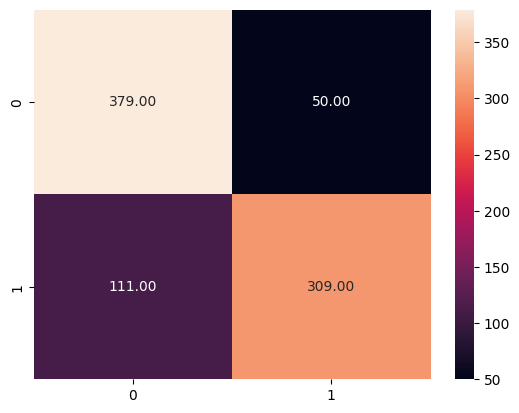

In [48]:
from sklearn.naive_bayes import BernoulliNB

classifier2 = BernoulliNB()
classifier2.fit(x_train, y_train)

y_pred2 = classifier2.predict(x_test)
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot = True, fmt='.2f')

From this, we can see that there are 111 positive statements that are wrongly classified as negative which is False Negative. There are 50 negative statements that are classified as positives indicating false positives. This shows that BernaulliNB might be a better model for this dataset.

In [49]:
round(accuracy_score(y_test, y_pred2), 3)

0.81

Test Accuracy has also increased considerablyusing the model! Let's check for overfitting -

In [50]:
y_pred_train2 = classifier2.predict(x_train)
round(accuracy_score(y_train, y_pred_train2), 3)

0.916

Still overfitting is there, though much reduced than before. Let's look into the complete classification report -

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       429
           1       0.86      0.74      0.79       420

    accuracy                           0.81       849
   macro avg       0.82      0.81      0.81       849
weighted avg       0.82      0.81      0.81       849



Now we can think of some way to increase the accuracy more. What can we do? Let's try changing the BagOfWord model. We were using CountVectorizer till now, let's use tf idf vectorizer and see the difference -

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(df['clean_text'])

In [54]:
x1 = features.toarray()

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.10, random_state = 42)

In [56]:
#Let's use GaussianNB first

classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

<Axes: >

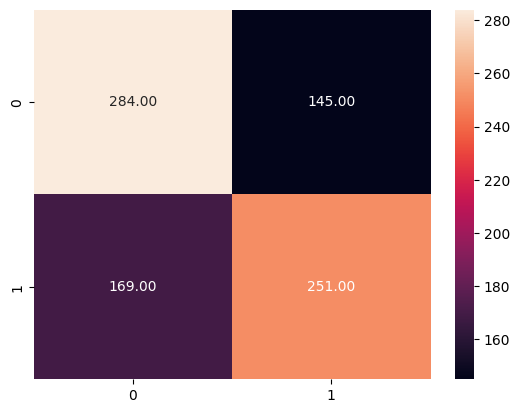

In [57]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='.2f')

In [58]:
round(accuracy_score(y_test, y_pred), 3)

0.63

<Axes: >

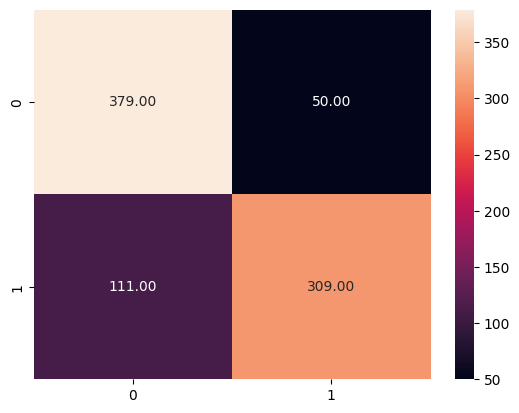

In [59]:
#Now using BernaulliNB

classifier2 = BernoulliNB()
classifier2.fit(x_train, y_train)

y_pred2 = classifier2.predict(x_test)
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot = True, fmt='.2f')

In [98]:
round(accuracy_score(y_test, y_pred2), 3)

0.81

In [60]:
y_pred_train2 = classifier2.predict(x_train)
round(accuracy_score(y_train, y_pred_train2), 3)

0.916

In [61]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       429
           1       0.86      0.74      0.79       420

    accuracy                           0.81       849
   macro avg       0.82      0.81      0.81       849
weighted avg       0.82      0.81      0.81       849



Thus we see that the BernoulliNB model is best to use and not the Gaussian for this dataset. Also, model performance is not significantly changed with the change in the type of vectorization. Hence we will use some other form of word vectorization now other than BogOfWords and see the change. <br/>
BoW model ignores the sentence structure or the word sequences in a sentence. n-grams model takes care of that. The meaning of the words may change depending on the words it is preceding or succeeding. For example, in the sentence 'I am not happy' this not happy should be considered as one unit instead of two separate words. n-gram takes care of this fact and is a contiguous sequence of n words. When two consecutive words are treated as one unit, it is called bigram, for three consecutive words it is called trigram, and so on.  Let's use n-grams now -

In [62]:
tfidf2 = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
feature2 = tfidf2.fit_transform(df['clean_text'])

In [63]:
x = feature2.toarray()

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 42)

<Axes: >

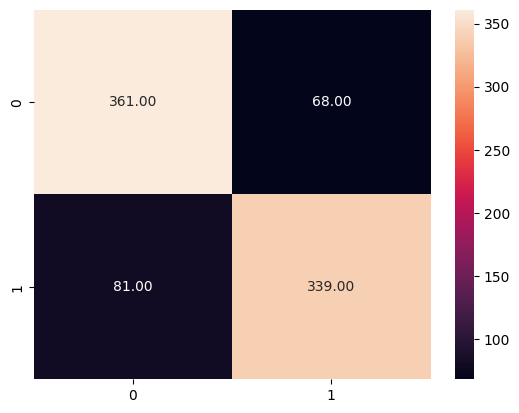

In [65]:
#using bernaulli since its performing best
#Now using BernaulliNB

classifier = BernoulliNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='.2f')

In [66]:
accuracy_score(y_test, y_pred)

0.8244994110718492

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       429
           1       0.83      0.81      0.82       420

    accuracy                           0.82       849
   macro avg       0.82      0.82      0.82       849
weighted avg       0.82      0.82      0.82       849



After changing the vectorizer type and using Bernaulli, we are able to achieve 82.4% accuracy. We jumped from 62.5% accuracy to 82.4% accuracy. There might be a bit of overfitting. So let's try to clean up the dataset first -

In [69]:
#removing the words of 1 letter or 0 letter
sentences_clean = []
for listed in df['clean_text'].str.split(' '):
    review = [word for word in listed if len(word) != 1 and len(word) != 0]
    review = ' '.join(review)
    sentences_clean.append(review)

In [70]:
#removing all same letters from string

def allCharactersSame(s) :
    n = len(s)
    for i in range(1, n) :
        if s[i] != s[0] :
            return False
 
    return True


cleaned = []
for sentences in sentences_clean:
    word_list = []
    for word in sentences.split(' '):
        if allCharactersSame(word):
            pass
        else:
            word_list.append(word)
    
    word_list = ' '.join(word_list)
    cleaned.append(word_list)


In [71]:
df['clean_text'] = cleaned

In [72]:
df.head()

,text,label,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,grew watch love thunderbird mate school watch ...
1,"When I put this movie in my DVD player, and sa...",0,put movi dvd player sat coke chip expect hope ...
2,Why do people who do not know what a particula...,0,peopl know particular time past like feel need...
3,Even though I have great interest in Biblical ...,0,even though great interest biblic movi bore de...
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dad armi fan noth ever chang got t...


Now let's perform vectorizer and classifiers -

In [73]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
feature = tfidf.fit_transform(df['clean_text'])

In [74]:
x = feature.toarray()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 42)

<Axes: >

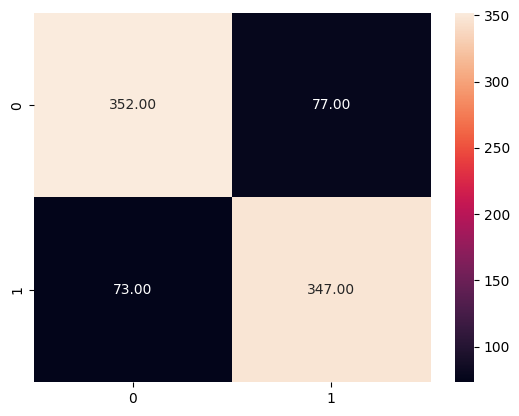

In [75]:
#using bernaulli since its performing best
#Now using BernaulliNB

classifier = BernoulliNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='.2f')

In [76]:
accuracy_score(y_test, y_pred)

0.823321554770318

In [77]:
y_pred1 = classifier.predict(x_train)

In [78]:
#training accuracy calculation
accuracy_score(y_train, y_pred1)

0.8984160230396648

As we can see after trying out all the methods, we came up with 82.3% accuracy and the accuracy out of training data is 89.8%. This shows there is a little bit of overfitting is still there in the model. We can try GridSearchCV to get the best parameter for the model. But I will continue with the accuracy of 82.3% which is quiet good looking into the training accuracy we are getting.

Let's test the model with complete unseen data.

##### Fresh dataset

In [89]:
#This is something I have written for testing
reviews = [
    "I didn't liked the movie. It was so boring.",
    'I am not happy that the movie ended so badly',
    "The movie is terrific. It's a must watch for every one."
]

In [90]:
dataframe = pd.DataFrame({'Text':reviews})
dataframe

,Text
0,I didn't liked the movie. It was so boring.
1,I am not happy that the movie ended so badly
2,The movie is terrific. It's a must watch for e...


In [91]:
#cleaning up the data and applying stemming
test_sent = get_clean_text(dataframe, 'Text')

In [92]:
test_sent

['like movi bore', 'happi movi end badli', 'movi terrif must watch everi one']

In [94]:
#converting into vectors using last trained n-grams model
x1 = tfidf.transform(test_sent).toarray()
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
#predicting unseen data using last trained classifier
y_pred_res = classifier.predict(x1)
y_pred_res

array([0, 0, 1], dtype=int64)

In [96]:
dataframe['predictions'] = y_pred_res.tolist()

In [97]:
dataframe

,Text,predictions
0,I didn't liked the movie. It was so boring.,0
1,I am not happy that the movie ended so badly,0
2,The movie is terrific. It's a must watch for e...,1


As we can see, the predictions of negative and positive are correct as per our data input which is unseen for our model. Now you can create your own text analytics model using the above procedure. Happy Coding :)